# Week 3-4 Exercises
# Rahul Rajeev

**1. Data Wrangling with Python: Activity 5, page 116**

In [2]:
# 1. Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2. Read in the boston housing dataset
housing_df = pd.read_csv('Boston_housing.csv')

In [4]:
# 3. check the first 10 records
housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [5]:
# the number of rows
print('The total number of rows by columns:', housing_df.shape)

The total number of rows by columns: (506, 14)


In [6]:
# 4. create a smaller dataframe with columns that do not include CHAS, NOX, B, LSTAT
# use drop function, setting axis to 1 for columns
small_df = housing_df.drop(['CHAS', 'NOX', 'B', 'LSTAT'], axis = 1)

In [7]:
# 5. Check the last seven records of the new dataframe
small_df.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


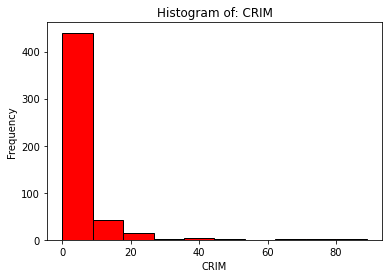

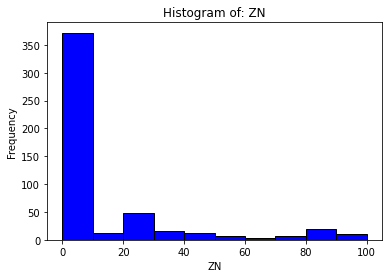

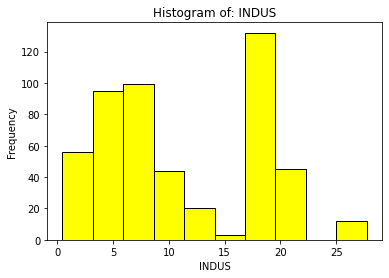

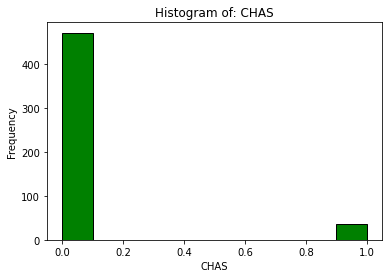

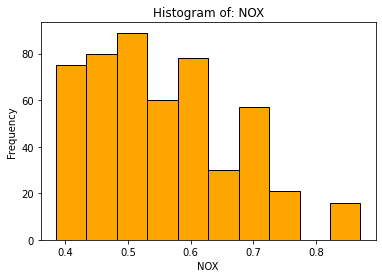

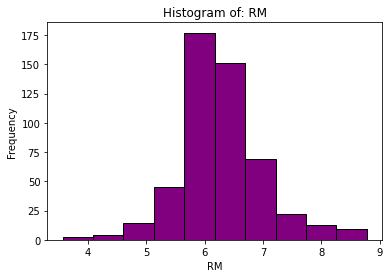

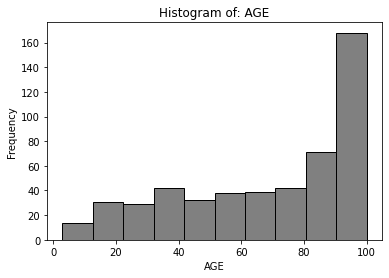

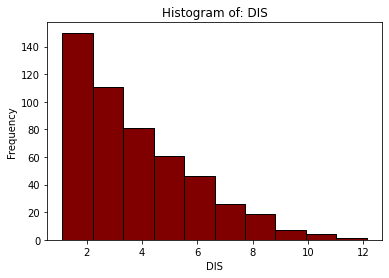

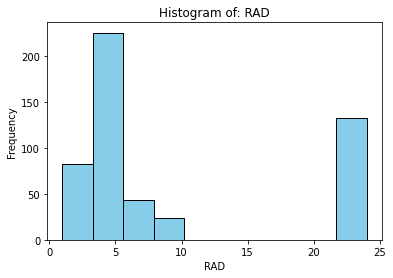

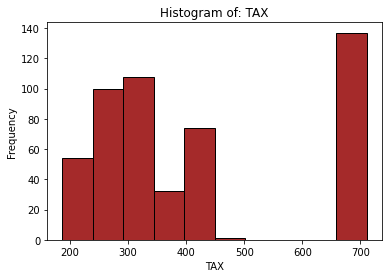

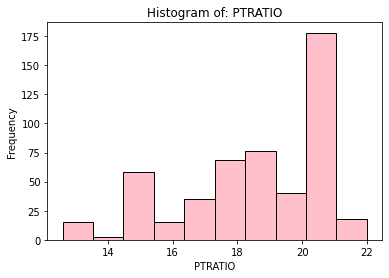

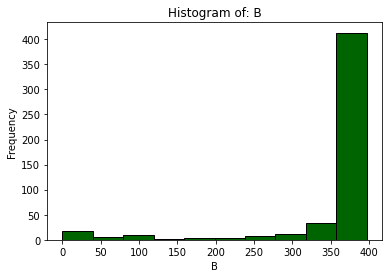

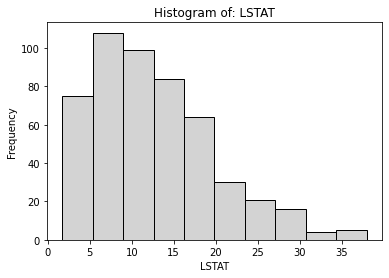

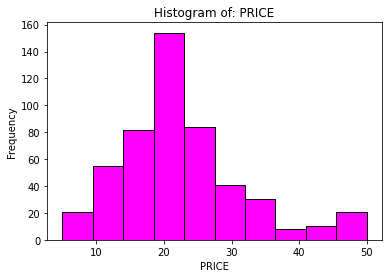

In [8]:
# 6. + 7. Plot the histograms of all the variables (columns) in the new DataFrame using a for loop
# combining the answer to both questions to save space

# colors list: I know these are not professional colors, but I felt like it could add a bit more funk
colors = ['red', 'blue', 'yellow', 'green', 'orange', 'purple', 'grey', 'maroon', 'skyblue', 'brown', 'pink', 'darkgreen',
         'lightgrey', 'magenta']

# iterating through the columns of the data frame to have unique titles and histograms
i=0
for col in housing_df.columns:
    plt.hist(housing_df[col], bins=10, edgecolor='black', color = colors[i])
    i += 1
    # adding some detail
    plt.title('Histogram of: '+col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Crime (x) vs. Price (y)')

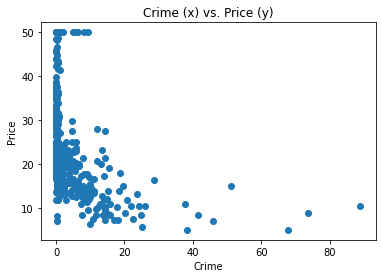

In [9]:
#8. Create a scatter plot of crime rate versus price.
plt.scatter(small_df['CRIM'], small_df['PRICE'])
plt.xlabel('Crime')
plt.ylabel('Price')
plt.title('Crime (x) vs. Price (y)')

Text(0.5, 1.0, 'Log Crime (x) vs. Price (y)')

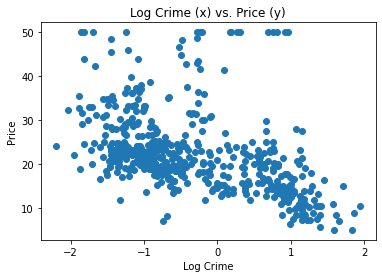

In [10]:
#9. Plot using log10(crime) versus price.
plt.scatter(np.log10(small_df['CRIM']), small_df['PRICE'])
plt.xlabel('Log Crime')
plt.ylabel('Price')
plt.title('Log Crime (x) vs. Price (y)')

In [11]:
# 10. Calculate some useful statistics, such as mean rooms per dwelling, median age, 
# mean distances to five Boston employment centers, and the percentage of houses with a low price (< $20,000).

# mean calculation
print('Mean rooms per dwelling: ', small_df['RM'].mean())

# median calculation
print('Median Age: ', small_df['AGE'].median())

# mean calculation
print('Mean distances to five Boston employment centers: ', small_df['DIS'].mean())

# subsetting the dataframe with rows of price less than 20, and then dividing the length of that column with the
# length of the entire column

print('Percentage of houses with a low price:', len(small_df[small_df['PRICE'] < 20]) / len(small_df['PRICE']) * 100, '%')

Mean rooms per dwelling:  6.284634387351788
Median Age:  77.5
Mean distances to five Boston employment centers:  3.795042687747034
Percentage of houses with a low price: 41.50197628458498 %


**2. Data Wrangling with Python: Activity 6, page 171**

In [12]:
# 1. import more libraries
import requests
import io

In [36]:
# 2. Read the dataset from the following url, I will use raw github url and requests, then decode
url = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Lesson04/Activity06/adult_income_data.csv'
download = requests.get(url).content
income_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [37]:
income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [38]:
# 3. function that reads the text file line by name
cols = []
with open('adult_income_names.txt','r') as file:
    for line in file:
        file.readline()
        var=line.split(":")[0]
        cols.append(var)

In [39]:
# 4. adding income as a response variable
cols.append('Income')

In [40]:
# reading the data frame again with the right columns
income_df = pd.read_csv(io.StringIO(download.decode('utf-8')), names = cols)
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [41]:
# 5. Create a DataFrame with only age, education, and occupation by using subsetting.
subset = income_df[['age','education','occupation']]
subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


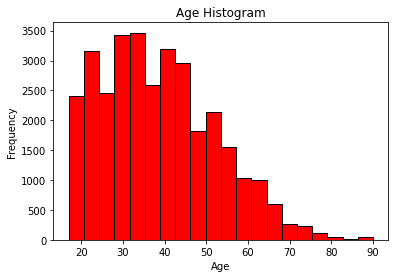

In [42]:
# 6. histogram of ages with 20 bins
plt.hist(subset['age'], bins=20, edgecolor='black', color = 'red')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [43]:
# 7. Create a function to strip the whitespace characters.
def strip_whitespace(s):
    return s.strip()

In [44]:
# 8. Use the apply method to apply this function to all the columns with string values, 
# create a new column, copy the values from this new column to the old column, and drop the new column.

# Education
subset['education_stripped']=income_df['education'].apply(strip_whitespace)
subset['education']=subset['education_stripped']
subset.drop(labels=['education_stripped'],axis=1,inplace=True)

# Occupation column
subset['occupation_stripped']=income_df['occupation'].apply(strip_whitespace)
subset['occupation']=subset['occupation_stripped']
subset.drop(labels=['occupation_stripped'],axis=1,inplace=True)

<ipython-input-44-ff1b9d130b90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['education_stripped']=income_df['education'].apply(strip_whitespace)
<ipython-input-44-ff1b9d130b90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['education']=subset['education_stripped']
C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [45]:
# 9. Find the number of people who are aged between 30 and 50.
range_df = subset[(subset['age']>=30) & (subset['age']<=50)]
print('There are', range_df.shape[0], 'people in this age range.')

There are 16390 people in this age range.


In [47]:
subset.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [48]:
# 10. Group the records based on age and education to find how the mean age is distributed.
# I think the assignment meant occupation and education because grouping by age and finding mean age means averaging
# occupation which does't make much sense.
subset.groupby(['occupation','education']).mean()

age
occupation       education              
?                10th          33.656863
                 11th          32.252101
                 12th          30.975000
                 1st-4th       63.833333
                 5th-6th       53.966667
...                                  ...
Transport-moving Doctorate     47.000000
                 HS-grad       39.347879
                 Masters       39.400000
                 Prof-school   59.000000
                 Some-college  38.385159

[217 rows x 1 columns]

In [65]:
# 11. Group by occupation and show the summary statistics of age.
age_summary = subset.groupby(['occupation']).describe()['age']
age_summary

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [66]:
# Find which profession has the oldest workers on average 

# use the summary and locate the max mean with index
age_summary.loc[age_summary['mean'].idxmax()]

count    4066.000000
mean       42.169208
std        11.974548
min        17.000000
25%        33.000000
50%        41.000000
75%        50.000000
max        90.000000
Name: Exec-managerial, dtype: float64

The Exec-managerial profession has the oldest workers on average

In [94]:
# which profession has its largest share of the workforce above the 75th percentile.

# initializing lists
above75workforce = []
occupations =[]

# iterating through occupations
for job in age_summary.index:
    # creating subset of each occupation
    job_subset = subset[subset['occupation']==job]
    # creating subsets of each occupation in the range above the 75th percentile
    above = job_subset[job_subset['age'] >= job_subset['age'].quantile(0.75)]
    # creating list from the dataframe returned from the previous line
    above_wf = above['age'].reset_index(drop=True).tolist()
    # calculating the length of the workforoce list
    above75length = len(above_wf)
    # appending the jobs and lengths to the above initialized lists
    occupations.append(job)
    above75workforce.append(above75length)

# creating a dictionary from the lists using the occupations as keys, and the lengths as the values
above75dict = {occupations[i]: above75workforce[i] for i in range(len(above75workforce))}
above75dict

{'?': 493,
 'Adm-clerical': 977,
 'Armed-Forces': 3,
 'Craft-repair': 1088,
 'Exec-managerial': 1061,
 'Farming-fishing': 260,
 'Handlers-cleaners': 365,
 'Machine-op-inspct': 534,
 'Other-service': 836,
 'Priv-house-serv': 38,
 'Prof-specialty': 1075,
 'Protective-serv': 166,
 'Sales': 969,
 'Tech-support': 253,
 'Transport-moving': 409}

In [96]:
# finding the workforce with maximum workers using max and a lambda function per occupation
max(above75dict, key=lambda key: above75dict[key])

'Craft-repair'

Craft-repair has the highest workforce above the 75th percentile.

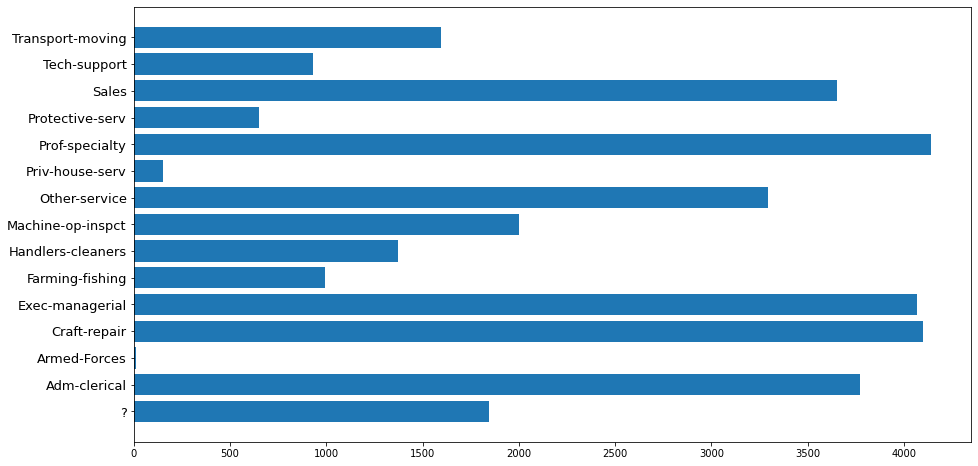

In [77]:
# 12. Use subset and groupby to find outliers.
occ_stats = subset.groupby('occupation').describe()['age']
plt.figure(figsize=(15,8))

# plotting the number of people vs occupation
plt.barh(y=occ_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

The occupation with the last number of people are armed forces and private house-services.

In [107]:
# 13. merge data using common keys

# creating one sample with age, work class, and occupation with random state set to be shared
df_1 = income_df[['age','workclass','occupation']].sample(5,random_state=152)
df_1

,age,workclass,occupation
1570,19,?,?
24919,39,Private,Sales
3844,37,Self-emp-inc,Exec-managerial
22883,48,Private,Machine-op-inspct
22330,69,Private,Adm-clerical


In [106]:
# creating another sample with education, marital status, and occupation with same random state and size
df_2 = income_df[['education','marital-status','occupation']].sample(5,random_state=152)
df_2

,education,marital-status,occupation
1570,Bachelors,Never-married,?
24919,Some-college,Married-civ-spouse,Sales
3844,Bachelors,Never-married,Exec-managerial
22883,HS-grad,Never-married,Machine-op-inspct
22330,Some-college,Widowed,Adm-clerical


In [110]:
# using merge function by occupation with an inner join
df_merged = pd.merge(df_1,df_2,on='occupation',how='inner')
df_merged

,age,workclass,occupation,education,marital-status
0,19,?,?,Bachelors,Never-married
1,39,Private,Sales,Some-college,Married-civ-spouse
2,37,Self-emp-inc,Exec-managerial,Bachelors,Never-married
3,48,Private,Machine-op-inspct,HS-grad,Never-married
4,69,Private,Adm-clerical,Some-college,Widowed


**3. Series Exercises**

In [111]:
# initializing dictionaries from lists
series1 = [7.3, -2.5, 3.4, 1.5]
label1 = ['a', 'c', 'd', 'e']
series2 = [-2.1, 3.6, -1.5, 4, 3.1]
label2 = ['a', 'c', 'e', 'f', 'g']

dict1 = {label1[i]: series1[i] for i in range(len(series1))}
dict2 = {label2[i]: series2[i] for i in range(len(series2))}

In [112]:
dict1

{'a': 7.3, 'c': -2.5, 'd': 3.4, 'e': 1.5}

In [113]:
dict2

{'a': -2.1, 'c': 3.6, 'e': -1.5, 'f': 4, 'g': 3.1}

In [115]:
# creating series from dictionary
seriesfromdict1 = pd.Series(dict1)
seriesfromdict2 = pd.Series(dict2)

In [116]:
seriesfromdict1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [117]:
seriesfromdict2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [118]:
# summing series
seriesfromdict1 + seriesfromdict2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [119]:
# subtracting series
seriesfromdict1 - seriesfromdict2

a    9.4
c   -6.1
d    NaN
e    3.0
f    NaN
g    NaN
dtype: float64